In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os, cv2
from PIL import Image

import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
%matplotlib inline

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
image_directory = 'drive/MyDrive/'
dataset = []
label = []

In [4]:
qiyana = os.listdir(image_directory + 'qiyana-resize/')
for i, image_name in enumerate(qiyana):
  if (image_name.split('.')[1] == 'jpg'):
    image = mpimg.imread(image_directory + 'qiyana-resize/' + image_name)
    image = Image.fromarray(image, 'RGB')
    dataset.append(np.array(image))
    label.append(1)

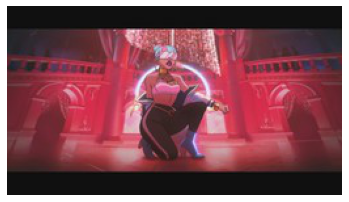

In [5]:
plt.axis('off')
# plt.imshow(cv2.cvtColor(dataset[100], cv2.COLOR_BGR2RGB))
plt.imshow(dataset[0])
plt.show()

In [6]:
not_qiyana = os.listdir(image_directory + 'not-qiyana-resize')
for i, image_name in enumerate(not_qiyana):
  if (image_name.split('.')[1] == 'jpg'):
    image = mpimg.imread(image_directory + 'not-qiyana-resize/' + image_name)
    image = Image.fromarray(image, 'RGB')
    dataset.append(np.array(image))
    label.append(0)

In [7]:
dataset = np.array(dataset)
label = np.array(label)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

1

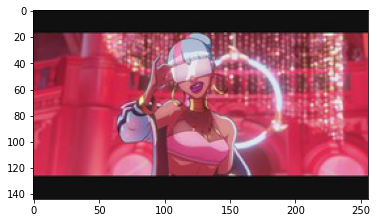

In [42]:
plt.imshow(X_train[0])
y_train[0]

In [35]:
# without scaling (normalize) the training may not converge.
# normalization is a rescaling of the data from the original range
# so that all values are within the range of 0 and 1.

# from keras.utils import normalize

# X_train = normalize(X_train, axis=1)
# X_test = normalize(X_test, axis=1)

In [ ]:
#Do not do one-hot encoding as it generates a shape of (num, 2)
#But the network expects an input of (num, 1) for the last layer for binary classification
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

# conv and pool layers with some normalization and drops in between

In [43]:
INPUT_SHAPE = (256, 144, 3)

In [44]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
# do not use softmax for binary classification. softmax is useful for mutually exclusive classes, either cat or dog but not both
# also, softmax outputs all add to 1. so good for multi class problems where each class is given a probability and all add to 1. Highest one wins.

# sigmoid outputs probability. can be used for non-mutually exclusive problems. but also good for binary mutually exclusive (cat or not cat)

In [45]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=10, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/10
10/10 [==============================] - 24s 2s/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 2.9885e-06 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 24s 2s/step - loss: 0.0211 - accuracy: 0.9904 - val_loss: 7.7695e-06 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 24s 2s/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 2.0109e-07 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 24s 2s/step - loss: 0.0140 - accuracy: 0.9984 - val_loss: 8.8426e-05 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 24s 2s/step - loss: 0.0085 - accuracy: 0.9952 - val_loss: 1.3334e-07 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 24s 2s/step - loss: 0.0060 - accuracy: 0.9968 - val_loss: 7.6935e-07 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 24s 2s/step - loss: 0.0080 - accuracy: 0.9936 - val_loss: 7.2081e-07 - val_accuracy:

In [56]:
!pip install pyyaml h5py
model.save('qiyana-binary-classification.h5')

In [ ]:
# plt.imshow(X_test[16])
# label[39]
len(dataset), len(label)

(780, 780)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(624, 156, 624, 156)

In [ ]:
import pandas as pd

1

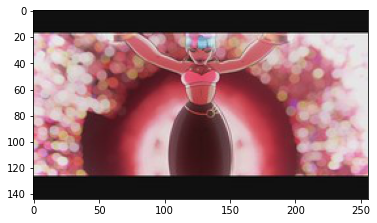

In [49]:
# data = [dataset, label]
# df = pd.DataFrame(list(zip(dataset, label)), columns=['image', 'output'])
# df
# df_train = pd.DataFrame(X_train, X_test, columns=['image', 'output'])
# df_train

plt.imshow(X_train[59])
y_train[59]

In [50]:
X_train[59]

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

In [ ]:
df.describe()

,output
count,780.000000
mean,0.500000
std,0.500321
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
df['image'][0]

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

# making classification on custom images

In [ ]:
loaded_model = tf.keras.models.load_model('qiyana-binary-classification.h5')

In [120]:
# get custom image filepaths
custom_path = 'drive/MyDrive/test-for-qiyana/'
# custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [58]:
custom_image_paths

['drive/MyDrive/test-for-qiyana/2019-11-13_0821-640x271.png',
 'drive/MyDrive/test-for-qiyana/660_e8e1ce839bd011c68a329d921ab7814c (1).jpg',
 'drive/MyDrive/test-for-qiyana/194-1940834_true-damage-qiyana-gif (1).jpg',
 'drive/MyDrive/test-for-qiyana/qiyana1.png']

In [169]:
test_qiyana = []
qiyana_new_list = os.listdir(custom_path)
for i, image_name in enumerate(qiyana_new_list):
  if (image_name.split('.')[1] == 'jpg'):
    image = mpimg.imread(custom_path + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((256, 144))
    test_qiyana.append(np.array(image))

In [170]:
test_qiyana = np.array(test_qiyana)

In [171]:
custom_preds = loaded_model.predict(test_qiyana)

In [174]:
custom_preds

array([[0.],
       [1.]], dtype=float32)

In [129]:
custom_preds[0]

array([1.1117743e-30], dtype=float32)

In [134]:
print(custom_preds[0])

[1.1117743e-30]


In [141]:
x = np.array([1.1117743e-30, 1.0000000e+00])
print(x)

[0. 1.]


In [144]:
np.set_printoptions(suppress=True)
print(x)

[0. 1.]


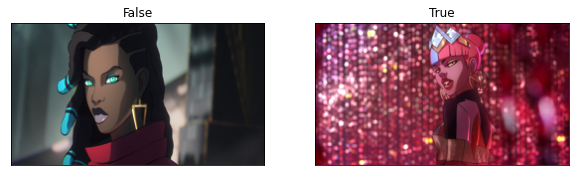

In [183]:
# check custom image predictions (qiyana or not qiyana)
plt.figure(figsize=(10, 10))
for i, image in enumerate(test_qiyana):
  plt.subplot(1,2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(np.array(bool(custom_preds[i])))
  plt.imshow(image)